First the area detector and motor are setup along with the bluesky environment from a python setup file. A laser device is also setup allowing the tracking of the IDs of the laser pulses. This setup file could also include custom plans designed for this experimental setup.

In [ ]:
from ophyd_hardware_setup import *

A scan can then be run. This first example scans in 11 steps between -180° and +180°.



Transient Scan ID: 3     Time: 2023-09-21 11:08:02
Persistent Unique Scan ID: '1014605b-b3cb-48fc-80fa-fb9592f44dd4'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |     motor1 |
+-----------+------------+------------+
|         1 | 11:08:03.2 |        -10 |
|         2 | 11:08:03.5 |         -8 |
|         3 | 11:08:03.7 |         -6 |
|         4 | 11:08:04.0 |         -4 |
|         5 | 11:08:04.2 |         -2 |
|         6 | 11:08:04.5 |          0 |
|         7 | 11:08:04.8 |          2 |
|         8 | 11:08:05.1 |          4 |
|         9 | 11:08:05.3 |          6 |
|        10 | 11:08:05.6 |          8 |
|        11 | 11:08:05.9 |         10 |
+-----------+------------+------------+
generator simple_scan ['1014605b'] (scan num: 3)





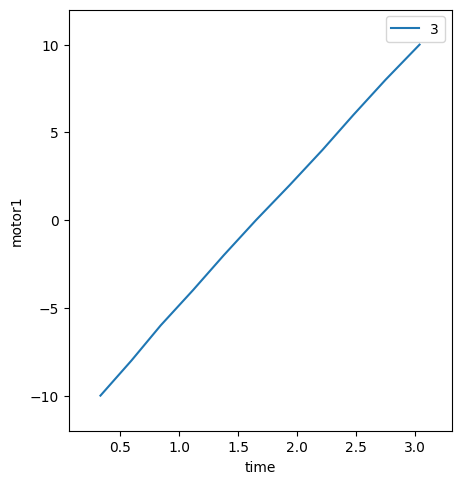

CA client library is unable to contact CA repeater after 50 tries.
Silence this message by starting a CA repeater daemon
or by calling ca_pend_event() and or ca_poll() more often.


In [4]:
uids = RE(scan([det,laser1], motor1, -180, 180, 11))

To access the data stored in the databroker catalog run the following:

In [5]:
run = catalog[uids[0]] #Accesses the run based on its uid, the most recent run can also be accessed as catalog[-1]
data = run.primary.read()
data

<xarray.Dataset>
Dimensions:               (time: 11, dim_0: 1, dim_1: 1024, dim_2: 1024)
Coordinates:
  * time                  (time) float64 1.695e+09 1.695e+09 ... 1.695e+09
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    motor1                (time) float64 -10.0 -8.0 -6.0 -4.0 ... 6.0 8.0 10.0
    motor1_user_setpoint  (time) float64 -10.0 -8.0 -6.0 -4.0 ... 6.0 8.0 10.0
    det_image             (time, dim_0, dim_1, dim_2) uint8 41 39 41 ... 47 46

The image data is accessed as shown below.

In [9]:
image = data["det_image"]
frame = image[0][0]  
#Index 1 refers to the time of the image and the second index refers to the frame number
frame

<xarray.DataArray 'det_image' (dim_1: 1024, dim_2: 1024)>
array([[41, 39, 41, ..., 36, 36, 39],
       [41, 41, 44, ..., 40, 40, 41],
       [44, 44, 46, ..., 37, 38, 40],
       ...,
       [37, 36, 38, ..., 36, 36, 38],
       [38, 37, 38, ..., 33, 34, 35],
       [37, 40, 39, ..., 37, 36, 38]], dtype=uint8)
Coordinates:
    time     float64 1.695e+09
Dimensions without coordinates: dim_1, dim_2
Attributes:
    object:   det

Alternatively the image can be viewed graphically:

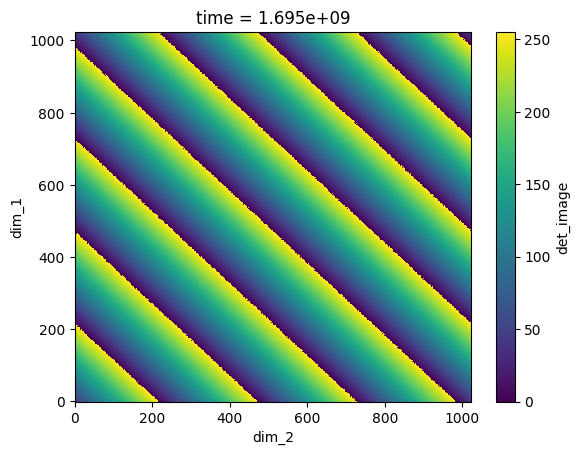

In [11]:
frame.plot.pcolormesh()